In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import preprocessing
import math

In [2]:
Breast_cancer=pd.read_csv("breast1.csv")
Breast_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
Breast_cancer=Breast_cancer.drop('Unnamed: 32', axis=1)

In [7]:
print("No. patients in original Data",str(len(Breast_cancer.index)))

No. patients in original Data 569


# Analyzing the Data

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

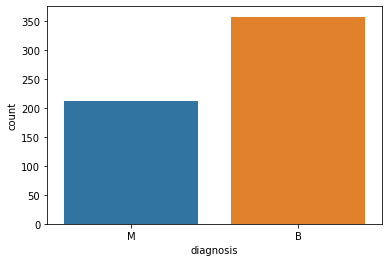

In [8]:
sns.countplot(x="diagnosis",data=Breast_cancer )

In [9]:
Breast_cancer.replace({'diagnosis':{'B':1, 'M':0}}, inplace=True)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

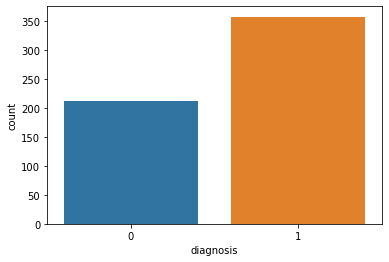

In [10]:
sns.countplot(x="diagnosis",data=Breast_cancer )

Plot after changing the categorical to numerica one

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

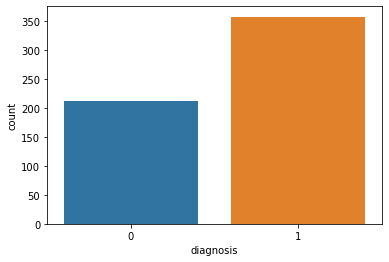

In [184]:
sns.countplot(x="diagnosis",data=Breast_cancer )

In [13]:
benign, malignant = Breast_cancer['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212


In [14]:
print('% of cells labeled Benign', round(benign / len(Breast_cancer) * 100,2), '%')
print('% of cells labeled Malignant', round(malignant / len(Breast_cancer) * 100,2), '%')

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


Out of the 569 observations, 357 (or 62.7%) have been labeled malignant, while the rest 212 (or 37.3%) have been labeled benign

# generate a scatter plot matrix with the "mean" columns

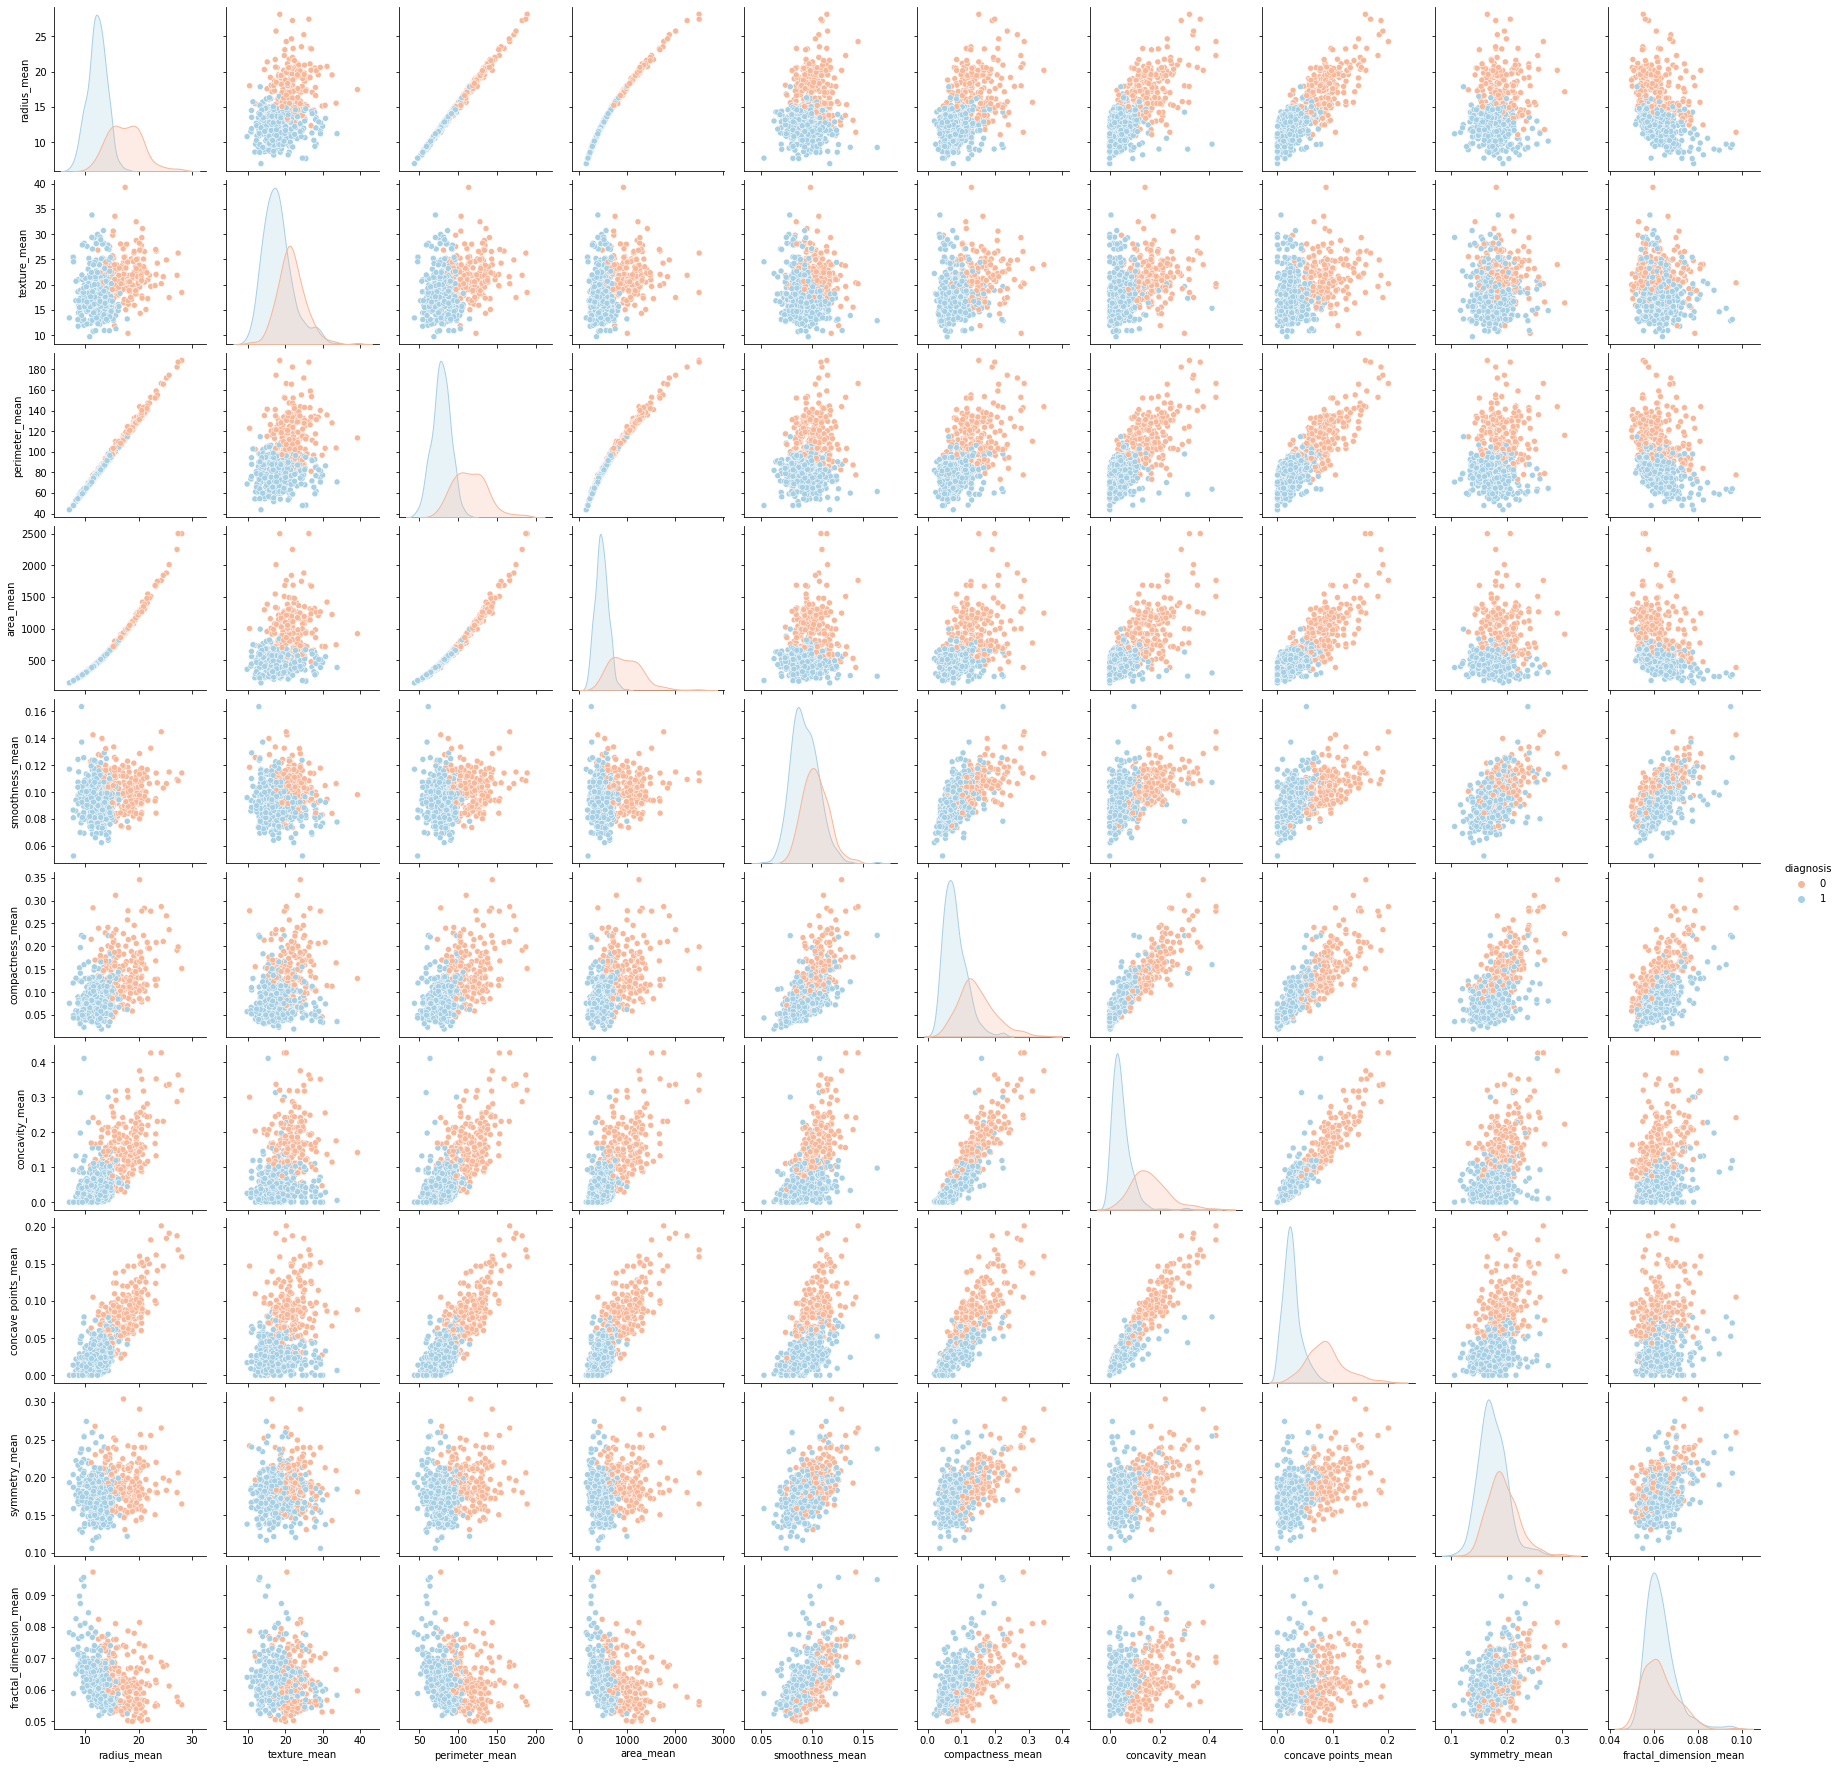

In [15]:
cols = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(data=Breast_cancer[cols], hue='diagnosis', palette='RdBu')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the radius, perimeter and area 

In [16]:
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Wrangling

In [18]:
Breast_cancer.isnull() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


False means where value is not null and true means where value is null

In [19]:
Breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

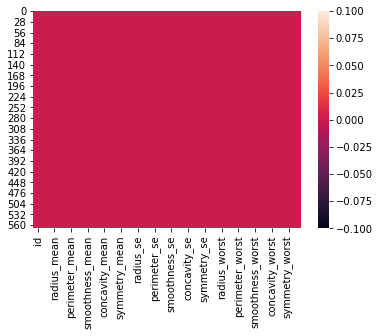

In [22]:
sns.heatmap(Breast_cancer.isnull())

In [23]:
Breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
Breast_cancer.dropna(inplace=True)

Train Data

In [25]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
x=Breast_cancer.drop("diagnosis",axis=1)
y=Breast_cancer["diagnosis"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [29]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [33]:
print('shape of xtrain:', x_train.shape)
print('shape of Ytrain:', y_train.shape)
print('shape of xtest:', x_test.shape)
print('shape of Ytest:', y_test.shape)

shape of xtrain: (455, 31)
shape of Ytrain: (455,)
shape of xtest: (114, 31)
shape of Ytest: (114,)


In [50]:
ytrain_pred=logmodel.predict(x_train)
ytest_pred=logmodel.predict(x_test)

In [51]:
prediction=logmodel.predict(x_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
classification_report(y_test,prediction)

E:\data\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        34\n           1       0.70      1.00      0.82        80\n\n    accuracy                           0.70       114\n   macro avg       0.35      0.50      0.41       114\nweighted avg       0.49      0.70      0.58       114\n'

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediction)

0.7017543859649122

In [59]:
#Evaluation of model

print('The accuracy score on Training data is:', accuracy_score(ytrain_pred, y_train))
print('The accuracy score on Test data is:', accuracy_score(ytest_pred, y_test))

The accuracy score on Training data is: 0.6087912087912087
The accuracy score on Test data is: 0.7017543859649122
